# Usage Guide

The following document is a guide to using the disk modeling code. It begins with a Quick Start guide, and progresses into more detail as to how to generate models.

## Quick Start Guide

Model images can be generated quickly using the default parameters in the modeling code:

In [8]:
import disk
x = disk.Disk() #creates a disk object using the default parameters

%run raytrace
total_model(x) #Runs radiative transfer using the disk object

/Users/kevinflahertyastro/Documents/GitHub/disk_model3/disk.py:209: RuntimeWarning: invalid value encountered in sqrt
  Omg = np.sqrt((dPdr/(rcf*self.rho0)+Disk.G*self.Mstar/(rcf**2+zcf**2)**1.5))


The above code first creates a disk object using the default parameters.

`x = disk.Disk()`

This disk object contains information on the density, temperature, and velocity throughout the disk. In the next step the code runs radiative transfer on this disk object, again with the default parameters.

`total_model(x)`

The output will be a fits file called `testpy_alma.fits`. By default this is a 15 channel model, with 0.32 km/s channels, for a HD 163296-like disk (see Rosenfeld et al. 2013). 

## Beyond the default

The code is designed to create model images for a wide range of disk structures, observed by different molecules, in a wide variety of observational configurations. As such, there is built-in flexibility when creating the disk object, and when running the radiative transfer.

The creation of the disk object and the radiative transfer calculation are independent, such that any disk object that you create can be passed to the radiative transfer calculation without any additional specification. Similary, the same disk object can be imaged using different molecules and spectral/spatial resolutions. This flexibility is designed to allow for efficient modeling of multiple emission lines for a given disk, and for simplified exploration of the parameter space for a given disk.

In the space below we start by going through the creation of disk objects, followed by a discussion of variations in the radiative transfer calculation.

### Different disks

There are multiple different base codes that model disk objects (e.g., `disk.py`, `debris_disk.py`) that are used to model disks with different underlying parametric structures (see model.ipynb for more details).

Accessing these different base models can be done by importing the different pieces of code. Once the disk code has been imported, the syntax for creating a disk object is the same.

In [4]:
### Create a protoplanetary-like disk
import disk
ppd = disk.Disk()

### Create an eccentric protoplanetary-like disk
import disk_ecc
ppd_ecc = disk_ecc.Disk()

### Create a debris disk
import debris_disk
dd = debris_disk.Disk()

Each of the above disk objects (`ppd`, `ppd_ecc`, `dd`) can be sent to `total_model` to create model emission. 

Each of these disk objects has also been created assuming the default parameters for that model. While each model requires a slightly different set of input parameters, the method for specifying these parameters is the same for any type of disk object. This is done by specifying the value of the specific parameter that you want to set. For example, if you want to create a proto-planetary-like object with a temperature power law that goes as $r^{-0.15}$, and a gass mass of 0.01 M$_{sun}$, the syntax is:

In [5]:
ppd2 = disk.Disk(q=-0.15,McoG=0.01)

/Users/kevinflahertyastro/Documents/GitHub/disk_model3/disk.py:209: RuntimeWarning: divide by zero encountered in true_divide
  Omg = np.sqrt((dPdr/(rcf*self.rho0)+Disk.G*self.Mstar/(rcf**2+zcf**2)**1.5))
/Users/kevinflahertyastro/Documents/GitHub/disk_model3/disk.py:209: RuntimeWarning: invalid value encountered in true_divide
  Omg = np.sqrt((dPdr/(rcf*self.rho0)+Disk.G*self.Mstar/(rcf**2+zcf**2)**1.5))


In this case the temperature power law parameter and the gas mass have been changed, while the other parameters of the model have been kept at the default values. 

Similarly, we might want to change the eccentricity for the eccentric disk model, or the stellar luminosity used to calculate the gas and dust temperature in the debris disk model.

In [6]:
ppd_ecc2 = disk_ecc.Disk(ecc=0.05)

dd2 = debris_disk.Disk(Lstar=0.1) 

As mentioned above, each type of disk object has a slightly different set of input parameters. The list of input parameters, along with their default values (most often based on a HD 163296-like disk) are listed in the table below.

| Parameter | Description | disk.py | disk_pow.py | disk_ecc.py | debris_disk.py | 
|-----------|-------------|---------|-------------|-------------|----------------|
|`q`        | Temperature power law parameter | -0.5    | -0.5      | -0.5      | -0.5          |
|`McoG`     | Gas mass (in M$_{sun}$) | 0.09 | 0.09 | 0.09 | 0.09 |
|`pp`       | Surface density power law parameter | 1 | 1 | 1 | 1 |
|`Rc`       | Critical radius, in au[^1] | 150 | 150 | 150 | 150 |
|`incl`     | Inclination, in degrees | 51.5 | 51.5 | 51.5 | 51.5 |
|`Mstar`    | Stellar mass, in M$_{sun}$ | 2.3 | 2.3 | 2.3 | 2.3 |
|`Xco`      | CO abundance, relative to H$_2$ | 10$^{-4}$ | 10$^{-4}$ | 10$^{-4}$ | 10$^{-4}$ |
|`vturb`    | Turbulence, in units of thermal broadening | 0.01 | 0.01 | 0.01 | 0.01 |
|`Zq0`      | $T(z)$ parameter, in au | 33.9 | 33.9 | 33.9 | 33.9 |
|`Tmid0`    | Midplane temperature normalization, in K | 19 | 19 | 19 | N/A |
|`Tatm0`    | Atmosphere temperature normalization, in K | 69.3 | 69.3 | 69.3 | N/A |
|`sigbound` | Vertical boundaries for molecular abundance, as vertically integrated column density, in units of $\Sigma_{21}$ | [0.79,1000] | [0.79,1000] | [0.79, 1000] | [0.79,1000] |
|`Rabund`   | Inner and outer radii for molecular gas distribution, in au | [10,1000] | [10,1000] | [10,1000] | [10,1000] |
|`handed`   | Handedness of rotation, +1 or -1 | -1 | -1 | -1 | -1 |
|`vtalpha`  | Radial power law index for turbulence | 0 | 0 | 0 | N/A |
|`vtsig`    | Vertical Gaussian width for turbulence | 0 | 0 | 0 | N/A |
|`Lstar`    | Stellar luminosity, in L$_{sun}$ | N/A | N/A | N/A | 1 |
|`sh_param` | Scale height parameter, =H/R | N/A | N/A | N/A | .1 |
|`ecc`      | Eccentricity of the disk | N/A | N/A | 0. | N/A |
|`aop`      | Angle of periapsis, in degrees | N/A | N/A | 0. | N/A |

|Parameter | Description |  disk.py | disk_pow.py | disk_ecc.py | debris_disk.py | 
|----------|-------------|---------|-------------|-------------|----------------|
|`nr`      | Number of grid cells in the radial direction in the radiative transfer grid | 180 | 180 | 180 | 180 |
|`nphi`    | Number of grid cells in the azimuthal direction in the radiative transfer grid | 131 | 131 | 131 | 131 |
|`nz`      | Number of grid cells in the vertical direction in the radiative transfer grid | 300 | 300 | 300 | 300 |
|`zmax`    | Maximum vertical extent of the computational domain, in au | 170 | 170 | 170 | 170 |
|`Rin`      | Inner radial edge of computational domain, in au | 1 | 10 | N/A | 10 |
|`Rout`     | Outer radial edge of computational domain, in au | 1000 | 1000 | N/A | 1000 |
|`Ain`      | Inner radial edge of the computational domain, in au | N/A | N/A | 10 | N/A |
|`Aout`     | Outer radial edge of the computational domain, in au | N/A | N/A | 1000 | N/A |
|`r_gridsize`| Number of radial grid cells when calculating density, temperature | N/A | N/A | N/A | 500 |
|`z_gridsize`| Number of vertical grid cells when calculating density, temperature | N/A | N/A | N/A | 500 |


In addition to input parameters with numerical values, there are other parametes that control e.g. how turbulence is treated 

|Parameter | Description |  disk.py | disk_pow.py | disk_ecc.py | debris_disk.py | 
|----------|-------------|---------|-------------|-------------|----------------|
|`rtg`     |Calculate the radiative tranfer grid when creating the disk object? | True | True | True | True|
|`vcs`  |Treat turbulence as protportional to the sound speed?[^2] | True | True | True | True|
|'`sh_relation` | How H is related to R[^3] | N/A | N/A | N/A | `'linear'` |
|`line` | Molecular line to model[^4] | `'co'` | `'co'` | `'co'` | `'co'` |
|`ring` | Add a ring?[^5] | `None` | `None` | `None` | `None` |
|`annulus` | Include an annulus[^6] | N/A | N/A | N/A | `None` |
|`exp_temp` | Use an exponential vertical temperature profile | False | False | N/A | N/A |
|`include_selfgrav` | Include disk self-gravity in the orbital velocity calculation | False | False | N/A | N/A |



[^1]: For `disk_pow.py`, `Rc` specifies the outer edge of the disk. 
[^2]: If False, the `vturb` value is treated as the turbulence in units of km/s.
[^3]: Possible values are `'linear'` or `'const'`.
[^4]: Possible values are `'co'`, `'c18p'`, `'13co'`, `'hco'`, `'hcn'`, `'cs'`, `'dco'`.
[^5]: Set this parameter to a list of [Rring,Wring,Sig_Enhance] to include a corresponding additional ring of emission, where Rring is the center radius of the ring (in au), Wring is the width of the ring (in au), and Sig_Enhance is ???
[^6]: Set this parameter to [Rin,Rout,mass] to include an additional annulus of material, with an inner radius Rin (in au), an outer radius of Rout (in au) and a total mass of mass (in Earth masses).

### Varying Model Image

Once a disk object is created, the function `total_model` can create a set of channel maps. The exact apperance of the disk depends on the number of channels, the exact line used, the size of the image, etc., all of which are specified within `total_model`. These parameters can be broken down into those related to the spectrum, the image, the line, and extra parameters.


**Spectral Parameters**

|Parameter | Description | Default value | 
|----------|-------------|---------|
|`chanmin` | Minimum velocity, in km/s | -2.24 |
|`nchans`  | Number of channels | 15 |
|`chanstep`| Channel width, in km/s | 0.32 |
|`vsys` | Systemic velocity, in km/s | 5.79 |
|`obsv`[^7] | List of velocities for the channels in the data, in km/s | None |
|`flipme` | Mirror the spectrum about the central channel?[^8] | True |
|`bin` | The factor by which to bin down the spectrum | 1 |
|`hanning` | Apply Hanning smoothing in the spectral direction | True |
|`l_cloud` | Correct for absorption by an intervening cloud? | False |
|`tau` | List of maximum optical depths of intervening clouds | `[0,]` |
|`sigma_c` | List of Gaussian cloud widths, in km/s | `[6,]` |
|`velocity_c` | List of central velocities for the intervening clouds, in km/s | `[2,]` |

**Image Parameters**
|Parameter | Description | Default Value |
|----------|-------------|---------------|
|`imres` | Width of a pixel, in arc-seconds | 0.05 |
|`distance`| Distance to the object, in parsecs | 122 |
|`PA` | Position angle, east of north, in degrees | 312.46 |
|`offs` | List of RA and Dec positional offsets for the disk, in arc-seconds | `[0.0,0.0]` |
|`xnpix` | Number of pixels along the x-direction of the image (the image is assumed to be square) | 512 |

**Line Parameters**
|Parameter | Description | Default Value | 
|----------|-------------|---------------|
|`Jnum`   | Lower J quantum number of the transition | 2 |
|`freq0` | Rest frequency of the transition | 345.79599 |
|`abund` | Relative abundance of this molecule | 1 | 

**Other parameters**
|Parameter | Description | Default Value |
|----------|-------------|---------------|
|`wind`  | Include a wind? | False |
|`isgas` | Model gas emission? | True |
|`includeDust` | Include dust emission? | False |
|`extra` | Perform extra calculations?[^9] | 0 |
|`modfile` |Base of the model file name | `'testpy_alma'`|


[^7]: If specified, the model images will be interpolated onto the velocities in obsv, after adding the systemic velocity. 
[^8]: If True, this assumes that the central channel corresponds to zero velocity. Otherwise the reflection will be invalid.
[^9]: Valid values are 1 (plot a figure showing the disk structure with the tau=1 surface marked with a dashed line), 2.1 (print a list of heights that represent the Nth percentile of where the emission comes from at that radius), 2.2 (prints a list of temperatures that represent the Nth percentile of the gas temperature where the emission comes from at that radius), 3.0 (create channel maps where the pixel value is the height, in au, of the tau=1 surface), 3.1 (create channel maps where the pixel value is the temperature, in K, of the tau=1 surface), 3.2 (create channel maps where the pixel values are the maximum optical depth)

#### Specifying velocities

Model images are created at a set of different velocities, and the code includes a number of parameters to specify which velocities are used. There are two factors that, when used together, can complicate this setup (1) saving time by mirroring the emission about the central velocity, and (2) interpolating onto the velocity scale of the data.

The code uses the `chanmin`, `chanstep`, and `nchans` keywords to determine the velocities at which to calculate model images:
```
chans = np.arange(nchans)*chanstep+chanmin
```
where `chans` is a numpy array containing the velocities of each of the channels. 

Assuming the disk is axisymmetric (i.e., its structure doesn't change with azimuth) then the emission in corresponding blue- and red-shifted channels is a mirror image of each other. This behavior allows for the modeling calculation to be sped up substantially; half of the channel images can be generated and then mirrored about the center of the disk to produce the emission in corresponding channels on the other side of zero velocity. This is what happens when `flipme=True`, but *it assumes that zero velocity falls at the exact center of the velocity channels.* This means that to properly employ `flipme=True`, the values of `chanstep`, `chanmin`, and `nchans` must be set such that (1) there are an odd number of channels and the central channel has zero velocity or (2) there are an even number of channels and zero velocity falls halfway between the two central channels.

The following shows what happens if `flipme=True` when the central velocity channel is not at zero velocity (`total_model(x,chanstep=0.5,nchans=7,chanmin=-1.0,vsys=0.)`).

![Bad Chans](docs/images/bad_chans.png)

The three channels on the right are reflections of the three channels on the left, but since the central channel does not correspond to the zero velocity channel, this reflection is not accurate. 

Real data is rarely well-behaved enough to put zero velocity at the center of our channels, and adjustements are needed to accomodate the actual velocities of real data. The first adjustment is that the system we are simulating is almost never at rest with respect to us. It has a systemic velocity either towards or away from us, resulting in the zero velocity channel being offset by a systemic velocity (`vsys`). The radiative transfer itself is indifferent to this bulk motion of the system, and it only depends on the relative velocities of the different regions of the disk relative to the systemic velocity. For this reason the velocities used when performing the radiative transfer (i.e., `chans`) do not include any accounting for the systemic velocity. The systemic velocity is only added to `chans` after the model images have been generated. For this reason the value of `chanmin` needs to be specified based on the minimum velocity, *after* subtracting the systemic velocity. 

The second adjustment is that the channels might not be perfected centered on the systemic velocity. For example, an observation may be taken with channels of velocity 5.1, 5.2, 5.3, 5.4, 5.5 km/s, while the systemic velocity might be 5.27 km/s. In this case the central close is close to the systemic velocity, but not quite there. To properly use the mirroring technique via the `flipme` keyword, zero velocity needs to fall exactly at the center of the channels after accounting for the systemic motion. To account for the fact that zero velocity is not exactly at the center, the model can be generated at a set of velocities which allow for mirroring the model images, and then interpolated onto the velocity scale of the data. This allows for the computational speed-up associated with mirroring the model images, while also matching the velocities in the data.

Here are some examples to help illustrate this:

*Example 1* You want to simulate observations across five channels with 0.25 km/s channel spacings. You are only concerned with the model images, and don't need to match to data.

In that case, you would set `nchans=5`, `chanstep=0.25`, `vsys=0`, and `flipme=True`. The parameter `obsv` can be left at its default value. The value of `chanmin` needs to be set so that the central channel, in this case the third channel, has a velocity of zero. With 0.25 km/s channel spacings, this would imply `chanmin=-0.5`. 

*Example 2* You want to simulate observations across five channels with 0.25 km/s channel spacings for a system with a systemic velocity of 4.5 km/s.

Similar to example 1, you would set `nchans=5`, `chanstep=0.25`, and `flipme=True`, while setting `vsys=4.5`, and leaving `obsv` at its default value. We calculate `chanmin` ignoring the systemic velocity, and assuming the spectrum is centered at zero velocity, which results in `chanmin=-0.5`. 

*Example 3* You have a set of data with channels at 4.2 km/s, 4.35 km/s, 4.5 km/s, 4.65 km/s, 4.8 km/s, 4.95 km/s for a system with a systemic velocity of 4.65 km/s.

First, we can see that `chanstep=0.15` and we know that `vsys=4.65`. Subtracting the systemic velocity from the channel velocities gives `chanmin=-0.45`. The values of `chanstep` and `chanmin` put the zero velocity channel at the fourth channel, which is not the central channel among the six channels in the data. This means we need to use `nchans=7` with `flipme=True`, and set `obsv=[4.2,4.35,4.5,4.65,4.8,4.95]`. The code will calculate the emission at one extra red-shifted channel, but since this is a reflection of the emission in the most blue-shifted channel, it does not cost any extra time. By specifying `obsv` to the velocities of the data, the result with will a model fits file with six channels (not the seven specified by `nchans`), at the velocities of the data.

Alternatively, you could set `nchans=6` with `flipme=False` and leave `obsv` as its default value. This will accomplish the same goal, but may take longer as it will need to simulate the emission from every channel individually.  

*Example 4* You have a set of data with channels at 5 km/, 5.15 km/s, 5.3 km/s, 5.45 km/s, 5.6 km/s, 5.75 km/s, with a systemic velocity of 5.27 km/s.

First, we can set `chanstep=0.15` and `vsys=5.27`. The tricky bit here is what to choose for `chanmin`. Subtracting the systemic velocity from the minimum velocity channel in the data, as we did in the previous example, would give -0.27. But this not only results in no channel being at exactly zero velocity (the closest would be a channel at 0.03 km/s), it does not allow us to simulate all of the red-shifted channels. The maximum redshift in the data relative to the systemic velocity is 0.48 km/s, and in order to model this channel the minimum channel must be at least this large. The requirement that the minimum be less than -0.48, while setting the central channel at 0, results in `chanmin=-0.6` and `nchans=9`. The value of `obsv` would be a list containing the velocities of the data.


Having reached this point in the documentation you might think/hope that there is an easier way to handle all of this. And you are right! The function `calc_chans` within `single_model.py` takes as input the header of a data fits file and the systemic velocity of the data, and returns `obsv`, `chanstep`, `nchans`, `chanmin` (e.g., `obsv,chanstep,nchans,chanmin = calc_chans(hdr,vsys)`). The velocities of the data are calculated based on the header keywords and the subsequent values of `chanstep`, `nchans`, and `chanmin` are calculated according to:
```
chanstep = (obsv[1] - obsv[0])
nchans = 2*np.ceil(np.abs(obsv-vsys).max()/np.abs(chanstep))+1
chanmin = -(nchans/2. - 0.5)*chanstep
```


**A note on binning and Hanning smoothing.**

During the radiative transfer calculation, there are two additional parameters associated with the velocity scale. The `bin` parameter allows for model images to be created at a high spectral resolution, and then binned down to the observed resolution. The `bin` parameter can be set to any integer, with `bin=1` being the default. For example, setting `bin=2` in *Example 1* above would mean that the model simulates 10 channels at channel spacings of 0.125 km/s, and then bins the data back down to the original 5 channels and 0.25 km/s. The adjustement of `nchans` and `chanstep` is done automatically; you need to specify the `nchans` and `chanstep` of the output without trying to accomodate the correction for binning. If the model is being interpolated onto a set of velocities specified by `obsv`, the interpolation is handled prior to the binning.

Hanning smoothing is a correction accounting for the discrete nature of the time offsets used to create a spectrum (**Add link to more details.**). Hanning smoothing is applied after interpolation on `obsv` but before binning down the models. This simulates an observation that is taken at high spectral resolution and binned down to increase the SNR.

**A note on negative `chanstep`**

All of the above examples assumed that `chanstep` was positive, such that the velocity increases with channel number. But, strictly speaking, this is not necessary. You can specify `chanstep` as a negative number, in which case `chanmin` becomes the *maximum* velocity. You might be interested in this if you are dealing with data for which the velocity decreases as channel number increases.

Returning to example 4 from above, but now let's assume that the channels in the data are at 5.75 km/s, 5.6 km/s, 5.45 km/s, 5.3 km/s, 5.15 km/s, and 5 km/s, with a systemic velocity of 5.27 km/s. As before, you would set `vsys=5.27` but now `chanstep=-0.15`. The calculation for `chanmin`, which is now the *maximum* velocity, is the same as before:
```
chanstep = (obsv[1] - obsv[0])
nchans = 2*np.ceil(np.abs(obsv-vsys).max()/np.abs(chanstep))+1
chanmin = -(nchans/2. - 0.5)*chanstep
```

(The possibility of a negative `chanstep` is why we take the absolute magnitude of `chanstep` when calculating `nchans`. Otherwise `nchans` would be negative.)

### Included transitions

Part of the radiative transfer calculation involves the use of molecular constants (e.g. $A_{ij}$) for a particlar transition. These constants are read from files (e.g., co.dat) from the Leiden Atomic and Molecular database. In order to read in the proper file, the code needs to know which molecule it is simulating. It figures this out by looking at the J number and the wavelength of the transition, and matching it to a list of known transitions. The list of known transitions is:

- CO J=1-0, J=2-1, J=3-2, J=6-5
- 13CO J=2-1
- C18O J=1-0, J=2-1, J=3-2
- DCO+ J=3-2, J=4-3, J=5-4
- HCO+ J=4-3
- HCN J=4-3
- CS J=7-6

### The *extra* keyword

Within the function `total_model` there is the keyword `extra` which can take on the values 1, 2.1, 2.2, 3.0, 3.1, 3.2. Each of these values corresponds to a different ancillary product that can be produced by the radiative transfer code. 

**`extra` = 1**

When `extra=1` is set, the code produces a figure showing the density and temperature structure of the disk. 

3.832561557860999e-55 19.80673353584558
H100 (AU): 4.939
power law: 1.090
H100 (AU): 4.939
power law: 1.090


/Users/kevinflahertyastro/Documents/GitHub/disk_model3/raytrace.py:647: UserWarning: No contour levels were found within the data range.
  cs = plt.contour(disk.r[iphi,:,:]/disk.AU,disk.Z[iphi,:,:]/disk.AU,tau[iphi,:,:],(1,),colors='k',linestyles='--',linewidths=3)
/Users/kevinflahertyastro/Documents/GitHub/disk_model3/raytrace.py:648: UserWarning: No contour levels were found within the data range.
  cs_dust = plt.contour(disk.r[iphi,:,:]/disk.AU,disk.Z[iphi,:,:]/disk.AU,tau_dust[iphi,:,:],(1,),colors='k',linewidths=3)
/Users/kevinflahertyastro/Documents/GitHub/disk_model3/raytrace.py:660: UserWarning: No contour levels were found within the data range.
  cs = plt.contour(-disk.r[iphi,:,:]/disk.AU,disk.Z[iphi,:,:]/disk.AU,tau[iphi,:,:],(1,),colors='k',linestyles='--',linewidths=3)
/Users/kevinflahertyastro/Documents/GitHub/disk_model3/raytrace.py:661: UserWarning: No contour levels were found within the data range.
  cs_dust = plt.contour(-disk.r[iphi,:,:]/disk.AU,disk.Z[iphi,:,:]/dis

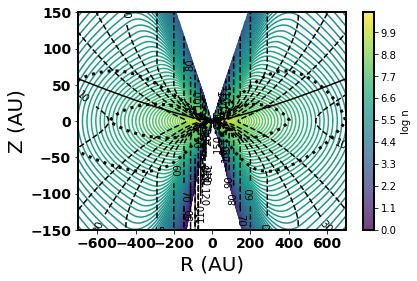

In [7]:
total_model(x,extra=1)

In this figure the colored contours represent the number volume density of H$_2$ molecules, and the dashed contours represent the gas temperature. The dotted lines show contours of vertically integrated column density, corresponding to 0.01 g cm$^{-2}$ (outer contour) and 0.1 g cm$^{-2}$ (inner contour). The solid line shows the pressure scale height, as calculated with the `calcH` function.

**`extra=2.1` or `extra=2.2`**

Using values of 2.1 or 2.2 provides similar functionality. It starts by considering lines of sight through bins 20 au wide and calculates either the intensity-weighted height or intensity-weighted temperature for each of those lines of sight. It then considers the distribution of intensity-weighted height/temperature values and reports various percentiles of this distribution. The idea is that we often want to know the height or temperature of the emitting region, while considering the fact that there are many lines of sight that pass through a given radius, and these lines of sight have various optical depths, which changes the exact height and temperature of the gas that is doing the emitting. Looking at percentiles in the distributions of height and temperature provide one measure of this distribution. A more complete description would take into account how much emission comes from each height and temperature, but that is for a future version of this code. 

Note that when considering the height of the emission, the code takes the absolute value of the height. This means that emission coming from the far side of the disk will still have positive Z values. 

In [10]:
%run raytrace
total_model(x,extra=2.1)

R, Z(5%), Z(16%), Z(25%), Z(50%), Z(75%), Z(84%), Z(95%): 10.0, 0.31, 0.82, 0.82, 1.95, 3.08, 3.08, 3.71
R, Z(5%), Z(16%), Z(25%), Z(50%), Z(75%), Z(84%), Z(95%): 30.0, 1.95, 3.71, 4.21, 6.48, 8.74, 9.87, 11.62
R, Z(5%), Z(16%), Z(25%), Z(50%), Z(75%), Z(84%), Z(95%): 50.0, 3.71, 6.48, 8.23, 12.13, 15.53, 16.66, 18.92
R, Z(5%), Z(16%), Z(25%), Z(50%), Z(75%), Z(84%), Z(95%): 70.0, 4.84, 9.36, 12.13, 17.79, 22.31, 24.07, 26.84
R, Z(5%), Z(16%), Z(25%), Z(50%), Z(75%), Z(84%), Z(95%): 90.0, 6.48, 12.13, 15.68, 24.07, 30.23, 31.36, 34.76
R, Z(5%), Z(16%), Z(25%), Z(50%), Z(75%), Z(84%), Z(95%): 110.0, 8.23, 15.53, 20.05, 30.23, 37.02, 39.28, 42.68
R, Z(5%), Z(16%), Z(25%), Z(50%), Z(75%), Z(84%), Z(95%): 130.0, 9.87, 18.92, 24.07, 35.89, 44.94, 47.20, 50.60
R, Z(5%), Z(16%), Z(25%), Z(50%), Z(75%), Z(84%), Z(95%): 150.0, 11.62, 22.94, 28.59, 42.17, 52.35, 55.12, 58.51
R, Z(5%), Z(16%), Z(25%), Z(50%), Z(75%), Z(84%), Z(95%): 170.0, 14.40, 26.84, 33.63, 49.46, 59.65, 61.91, 65.30
R, Z(5%),

In [11]:
total_model(x,extra=2.2)

R, T(5%), T(16%), T(25%), T(50%), T(75%), T(84%), T(95%): 10.0, 122.38, 177.29, 211.16, 238.83, 253.52, 258.61, 301.85
R, T(5%), T(16%), T(25%), T(50%), T(75%), T(84%), T(95%): 30.0, 104.50, 135.69, 138.70, 148.98, 166.65, 174.07, 183.56
R, T(5%), T(16%), T(25%), T(50%), T(75%), T(84%), T(95%): 50.0, 72.93, 109.72, 111.32, 116.84, 124.55, 127.47, 131.70
R, T(5%), T(16%), T(25%), T(50%), T(75%), T(84%), T(95%): 70.0, 52.36, 89.58, 95.60, 99.14, 103.64, 105.72, 108.31
R, T(5%), T(16%), T(25%), T(50%), T(75%), T(84%), T(95%): 90.0, 43.86, 76.65, 85.20, 87.83, 91.00, 92.34, 94.06
R, T(5%), T(16%), T(25%), T(50%), T(75%), T(84%), T(95%): 110.0, 38.81, 68.63, 77.59, 79.62, 82.00, 82.97, 84.23
R, T(5%), T(16%), T(25%), T(50%), T(75%), T(84%), T(95%): 130.0, 35.13, 61.61, 71.45, 73.37, 75.23, 76.01, 76.99
R, T(5%), T(16%), T(25%), T(50%), T(75%), T(84%), T(95%): 150.0, 32.65, 57.01, 66.08, 68.37, 69.91, 70.53, 71.32
R, T(5%), T(16%), T(25%), T(50%), T(75%), T(84%), T(95%): 170.0, 31.48, 53.87,

**`extra=3.0` or `extra=3.1` or `extra=3.2`**

Each of these setting produce channel maps, but instead of the value at each pixel representing the intensity along that line of sight, it represents either the height of the $\tau=1$ surface (`extra=3.0`), the temperature of the $\tau=1$ surface (`extra=3.1`), or the maximum optical depth along the corresponding line of sight (`extra=3.3`). These files will have the suffix `_tau1.fits` 

### Setting `exp_temp` to `True`

Setting the `exp_temp` parameter to `True` invokes a different vertical temperature profile for the disk. Instead of the Type II profile from Dartois et al. 2001, `exp_temp=True` uses the Type I temperature profile from Dartois et al., which is an exponential:

$$T(z) = T_{mid}\exp(\log(T_{atm}/T_{mid})*z/Z_q) $$

The temperature is capped at 500 K.

The figure below compares the Type I and Type II temperature profiles

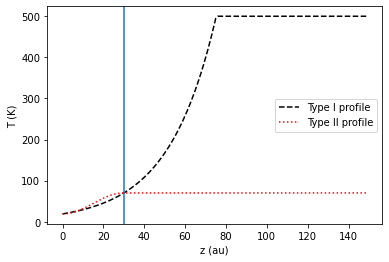

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Tmid = 19
Tatm = 70
Zq = 30
z = np.arange(0,150,1)

#Type I profile
T1 = Tmid*np.exp(np.log(Tatm/Tmid)*z/Zq)
T1[T1>500] = 500

#Type II profile
T2 = Tatm + (Tmid-Tatm)*np.cos((np.pi/(2*Zq))*z)**2
T2[z>Zq] = Tatm

plt.plot(z,T1,color='k',ls='--')
plt.plot(z,T2,color='r',ls=':')
plt.legend(('Type I profile','Type II profile'))
plt.xlabel('z (au)')
plt.ylabel('T (K)')
plt.axvline(Zq)

### The `ring` parameter

The `ring` parameter in `disk.py` allows you to add a temperature enhancement to an annulus in the disk. The intention is for this to be used to represent a break in the power law slope of the temperature profile in the inner part of the disk. 

`ring` is specified as a list, with the central radius of the ring (in au), the width of the ring (in au), and the power law slope to use for the inner disk (e.g., `ring=[50,100,-1.5]`). The following demonstrates the temperature affect for a given set of ring parameters.

/var/folders/n3/_s65fc7n5jd4gll4g_xrvwzc0000gq/T/ipykernel_650/68546793.py:6: RuntimeWarning: divide by zero encountered in power
  temp = 15*(r/150.)**(q)
/var/folders/n3/_s65fc7n5jd4gll4g_xrvwzc0000gq/T/ipykernel_650/68546793.py:11: RuntimeWarning: invalid value encountered in reciprocal
  temp[w] = temp[w]*(r[w]/(150))**(ring[2]-q)/((r[w].max()/150)**(-q+ring[2]))


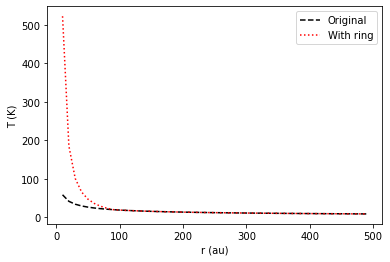

In [7]:
ring = [50,100,-1.5] #ring parameters [Rring, Wring, q_inner)


r=np.arange(0,500,10)
q = -0.5
temp = 15*(r/150.)**(q)
plt.plot(r,temp,color='k',ls='--')

## Add temperature enhancement, as is done in the code using the ring parameter
w = np.abs(r-ring[0])<ring[1]/2.
temp[w] = temp[w]*(r[w]/(150))**(ring[2]-q)/((r[w].max()/150)**(-q+ring[2]))

plt.plot(r,temp,color='r',ls=':')
plt.xlabel('r (au)')
plt.ylabel('T (K)')
plt.legend(('Original','With ring'))
                                               
                                               

Note that while the `ring` code is used for treating a temperature enhancement in the inner disk, it doesn't check to make sure that the central radius of the ring and the width of the ring are chosen such that the entire inner disk within a given radius is enclosed within the ring. In other words, for the code to work properly, *the width of the ring should be twice the central radius of the ring.*

The code below demonstrates what happens if this is not the case.

/var/folders/n3/_s65fc7n5jd4gll4g_xrvwzc0000gq/T/ipykernel_650/3556234648.py:6: RuntimeWarning: divide by zero encountered in power
  temp = 15*(r/150.)**(q)
/var/folders/n3/_s65fc7n5jd4gll4g_xrvwzc0000gq/T/ipykernel_650/3556234648.py:11: RuntimeWarning: invalid value encountered in reciprocal
  temp[w] = temp[w]*(r[w]/(150))**(ring[2]-q)/((r[w].max()/150)**(-q+ring[2]))


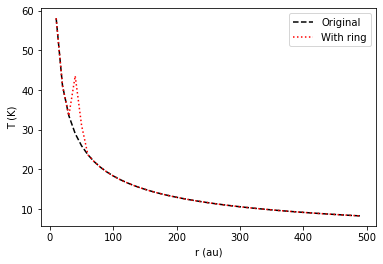

In [8]:
ring = [50,30,-1.5] #ring parameters [Rring, Wring, q_inner)


r=np.arange(0,500,10)
q = -0.5
temp = 15*(r/150.)**(q)
plt.plot(r,temp,color='k',ls='--')

## Add temperature enhancement, as is done in the code using the ring parameter
w = np.abs(r-ring[0])<ring[1]/2.
temp[w] = temp[w]*(r[w]/(150))**(ring[2]-q)/((r[w].max()/150)**(-q+ring[2]))

plt.plot(r,temp,color='r',ls=':')
plt.xlabel('r (au)')
plt.ylabel('T (K)')
plt.legend(('Original','With ring'))
                                        

### The `sigbound` parameter

Molecules are not distributed uniformly throughout the disk. In the case of CO, they are bounded by the freeze-out of CO onto dust grains deep within the disk, while in the upper layers they are bounded by the photo-dissociation of the molecule by high-energy photons from the central star. Other atoms and molecules may face similar constraints, albeit with different boundaries (e.g., different freeze-out temperatures). 

The `sigbound` parameter is an attempt to provide some flexibility as to how to place the atom/molecule in the disk. This parameter takes a two element list, representing the high-$z$ and low-$z$ boundaries for the atom/molecule. Between these boundaries the abundance of the atom/molecule is set to that specified when creating the disk object, while outside of these boundaries the abundance is depressed by eight orders of magnitude. Note that freeze-out is taken into account *after* setting the abundance in the region specified by `sigbound`. In other words, freeze-out is an additional depression of the abundance.

The values of the `sigbound` parameter are the vertically integrated column density, in units of $\Sigma_{21}$ (defined above). The first value is the minimum vertically integrated column density (corresponding to high-$z$) while the second value is the maximum vertically integrated column density (corresponding to low-$z$). The default values are taken from Qi et al. in their analysis of HD 163296.

Other things to describe in more detail:
- hanning smoothing and binning
- isgas and includeDust, and when to use which one.
- the functions within disk.py and what they do
- add_mol_ring